# Practice problem_Binary Classification with IMDB
IMDB dataset is about review for movie, positive or negative, and has 25,000 training set and 25,000 test set.

X is list of word sequence index and y is label indicate either positive or negative.

## 1. Data
### 1.1 Data load

In [2]:
from keras.datasets import imdb

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000) # num_words for dictionary

Using TensorFlow backend.


17465344/17464789 [==============================] - 15s 1us/step


##### X, word sequence

By indicating index of dictionary we can make representation of sentence.

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

##### Y, positive or not

In [14]:
train_label

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [15]:
train_label.shape

(25000,)

1 means positive and 0 means negative.

### 1.2 Data preparation

##### For X, one-hot encoding
For x, rather than type as it is, one-hot encoding each index of x is right form for keras.

So, by one-hot encoding, we can get 10,000 dimensional 2-D vector for 25,000 samples.

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

##### For Y, label to vector

In [18]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

Finally, we get 10,000 dimensional 2-D vectors as x and scalar (1-D tensors) as y

## 2. Algorithm
### 2.1 Model define

Algorithm I am going to use is 2 hidden layers each of which has 16 nodes and output layers with sigmoid, because it is binary classification.

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 2.2 Model compile (optimizer, loss, metric)

In [21]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 3. Training
### 3.1 Split train set into dev set and train set to validate

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 3.2 fit

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.5085 - binary_accuracy: 0.7816 - val_loss: 0.3798 - val_binary_accuracy: 0.8681
Epoch 2/20
15000/15000 [==============================] - 7s 494us/step - loss: 0.3005 - binary_accuracy: 0.9043 - val_loss: 0.3004 - val_binary_accuracy: 0.8899
Epoch 3/20
15000/15000 [==============================] - 6s 404us/step - loss: 0.2180 - binary_accuracy: 0.9289 - val_loss: 0.3083 - val_binary_accuracy: 0.8714
Epoch 4/20
15000/15000 [==============================] - 5s 350us/step - loss: 0.1751 - binary_accuracy: 0.9437 - val_loss: 0.2839 - val_binary_accuracy: 0.8834
Epoch 5/20
15000/15000 [==============================] - 7s 441us/step - loss: 0.1426 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8867
Epoch 6/20
15000/15000 [==============================] - 6s 371us/step - loss: 0.1150 - binary_accuracy: 0.9651 - val_loss: 0.3144 - val_bin

### 3.3 History
***model.fit*** method returns History objects. We can monitor training process by checking history.

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

##### Loss

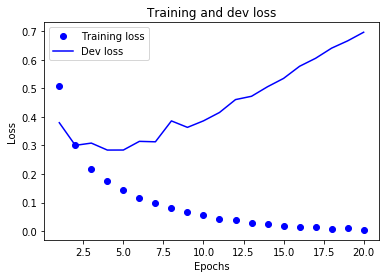

In [34]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
dev_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, dev_loss, 'b', label='Dev loss')
plt.title('Training and dev loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##### Accuracy

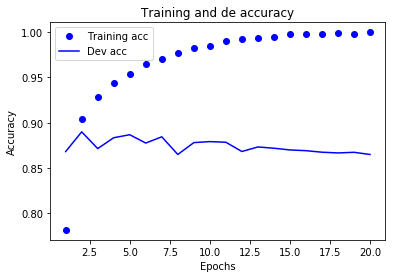

In [37]:
plt.clf() # Initialize graph
acc = history_dict['binary_accuracy']
dev_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, dev_acc, 'b', label='Dev acc')
plt.title('Training and de accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Predict

In [38]:
model.predict(x_test)

array([[0.00544623],
       [0.99999976],
       [0.7217965 ],
       ...,
       [0.00104324],
       [0.00960704],
       [0.4754443 ]], dtype=float32)

Outputs are probability that input test x would be positive review.